# The k-Arm Bandit Problem 

The k-arm Bandit problem we will consider here will be a straightforward where we will have k-arms/lever and a time step <i>t</i> you can only use one of the levers. When any of these levers will be used, you will get a reward <i>r</i> and the goal is to maximize the cummulative reward over a some time steps. We are looking for a policy that will help us to determine which actions to take such that it would help us achieve the largest possible reward in the long run, hence we would not rely on the immidiate reward <i>r</i> of the action but the value of the action <i>Q(a)</i> at any time step <i>t</i>. <i>Q(a)</i> is the cummulative reward that we have achieved when we took the action <i>a</i>. 

The first basic challenge of this problem is to choose a policy that balances the need of exploration and exploitation in our quest to achieve the maximum reward. <b>Exploration</b> is when our agent takes sub-optimal actions to explore if these actions will yield higher reward in the longer run. On the other hand, <b>Explotation</b> is exploting the prior knowledge and by taking the action or a set of actions that have yielded higher rewards. It is important to explore as it is not gauranteed that the greedy policy will always yield the maximum possible reward in the long-run. It also leaves the action space or state space unexplored which means we never went to states or took actions that might have given us lower rewards at first but would end up yielding the maximum reward in the long-run. Hence, we need some methods by which we can balance when to explore and when to exploit. One such set of solutions is the Action-Value methods. As suggested by the name, each action corresponds to a value that is the <b><i>Expected Return, q</i></b>. Hence, we want to learn a value function <i>Q</i> for every timestep <i>t</i>, that estimates the actual <i>q</i> and choose actions that maximizes our reward based on that.

We will calculate the estimate of <i>q(a)</i>; <i>Q(a)</i> at any timestep <i>t</i> by the <i>sample-average</i> method that is the ratio of the sum of the rewards yielded by taking action <i>a</i> prior to timestep <i>t</i> and the number of times the action <i>a</i> is taken prior to timestep t. The mathmatical intution can be given by:

$$Q(a)=\frac{\sum_{i=1}^{t-1}{r_i|a}}{n_a}$$

Now that we have our estimates, we need a policy that helps us select our actions based on these estimates. We can choose one of the two policies; 1) <b>Greedy Policy:</b> Always select the action with the highest value or 2) <b>e-Greedy Policy:</b> With some very small probability <i>e</i> explore the action space and select one on radom rather than taking the greedy action. 

In [1]:
#Importing neccessary libraries
import sys
import numpy as np
sys.path.append("./")
from environment import Bandit
import matplotlib.pyplot as plt

In [2]:
#Using the Bandit class defined in environment.py to make our env
#with the following specs, 
#1. Trials, is the number of experiments or episodes we want to conduct
#2. Steps are the number of timesteps taken in each episode
#3. k, is the number of arms of the Bandit
trials = 2000
steps = 1000
k=10

env = Bandit(trials=trials,
             steps=steps,
             k=k)

In [3]:
#Defining our greedy policy that always choses the action with the highest value
def greedy_policy(q_vals:list):
    """
    The function chooses the action with the highest value.
    
    Params
    ------
    
    q_vals: The list of value of each action, the index corresponds to the arm
    
    Returns
    -------
    action, value
    
    """
    index = np.argmax(q_vals)
    return index, q_vals[index]
    

In [4]:
#Get the reward matrix for each trial, the row represent a unique trial and
#the cols represent expected return at each timestep
#This is one is with using greedy policy
is_optimal,_, rewards = env.simulate(policy=greedy_policy)


              Initial conditions:
              Number of Trials = 2000
              Number of Steps per Trial = 1000
              NUmber of Bandit Arms = 10
              


  0%|          | 4/2000 [00:00<00:57, 34.78it/s]

100%|██████████| 2000/2000 [01:11<00:00, 27.79it/s]


In [16]:
#The shape should be (episodes, timesteps)
rewards.shape

(2000, 1000)

In [17]:
#Calculate mean reward at each timestep across the episodes
expected_reward = np.mean(rewards, axis=0)
expected_reward.shape

(1000,)

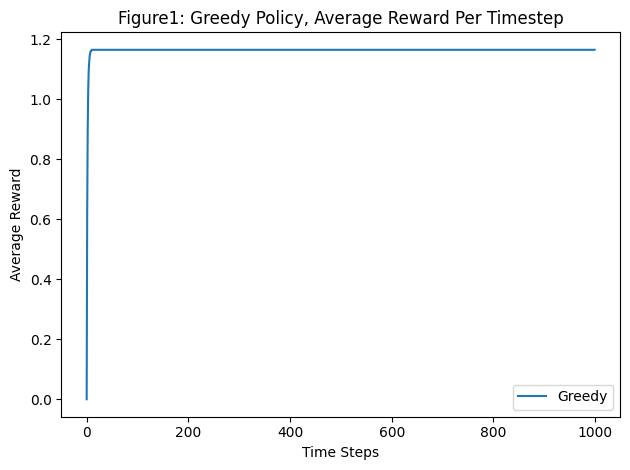

In [18]:
plt.plot(expected_reward, label="Greedy")
plt.title("Figure1: Greedy Policy, Average Reward Per Timestep")
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
average_io = is_optimal.mean(axis=0)
average_io.shape

(1000,)

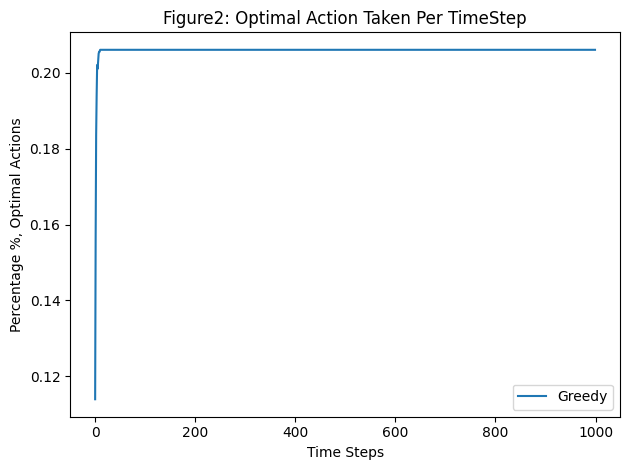

In [38]:
plt.plot(average_io, label="Greedy")
plt.title("Figure2: Optimal Action Taken Per TimeStep")
plt.ylabel("Percentage %, Optimal Actions")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
#Epsilon Greedy Policy
def e_greedy_policy(q_vals:list, eps=0.01):
    """
    This function is responisble for choosing the next action based 
    on a a simple logic that With some very small probability eps explore the action space 
    and select one on radom rather than taking the greedy action. 
    """
    prob = np.random.random()
    if prob<=eps:
        action = np.random.choice(range(len(q_vals)),size=1)[0]
        return action, q_vals[action]
    else:
        return greedy_policy(q_vals=q_vals)
        

In [13]:
is_optimal_2,_, sample_rewards = env.simulate(policy=e_greedy_policy)


              Initial conditions:
              Number of Trials = 2000
              Number of Steps per Trial = 1000
              NUmber of Bandit Arms = 10
              


100%|██████████| 2000/2000 [01:27<00:00, 22.98it/s]


In [14]:
#Taking mean reward per timestep
avergae_sample_rewards = np.mean(sample_rewards, axis=0)
avergae_sample_rewards.shape

(1000,)

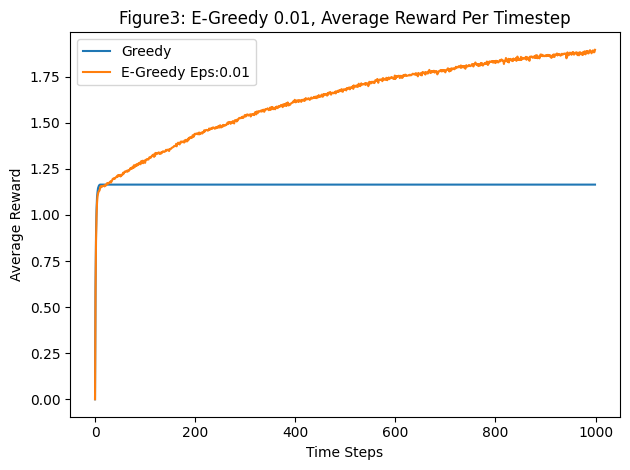

In [20]:
plt.plot(expected_reward, label="Greedy")
plt.plot(avergae_sample_rewards, label="E-Greedy Eps:0.01")
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.title("Figure3: E-Greedy 0.01, Average Reward Per Timestep")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
average_io_2 = is_optimal_2.mean(axis=0)
average_io_2.shape

(1000,)

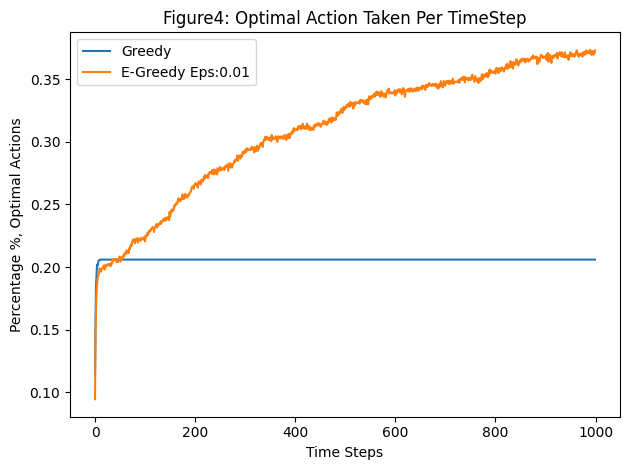

In [24]:
plt.plot(average_io, label="Greedy")
plt.plot(average_io_2, label="E-Greedy Eps:0.01")
plt.title("Figure4: Optimal Action Taken Per TimeStep")
plt.ylabel("Percentage %, Optimal Actions")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
#Increasing the value of eps; we will explore more
def e_greedy_policy(q_vals:list, eps=0.1):
    prob = np.random.random()
    if prob<=eps:
        action = np.random.choice(range(len(q_vals)),size=1)[0]
        return action, q_vals[action]
    else:
        return greedy_policy(q_vals=q_vals)
        

In [26]:
is_optimal_3,_, sample_rewards_2 = env.simulate(policy=e_greedy_policy)


              Initial conditions:
              Number of Trials = 2000
              Number of Steps per Trial = 1000
              NUmber of Bandit Arms = 10
              


100%|██████████| 2000/2000 [01:48<00:00, 18.38it/s]


In [27]:
avergae_sample_rewards_2 = np.mean(sample_rewards_2, axis=0)
avergae_sample_rewards_2.shape

(1000,)

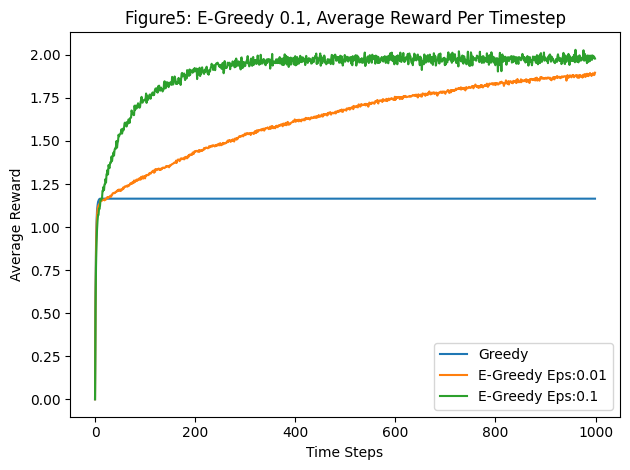

In [31]:
plt.plot(expected_reward, label="Greedy")
plt.plot(avergae_sample_rewards, label="E-Greedy Eps:0.01")
plt.plot(avergae_sample_rewards_2, label="E-Greedy Eps:0.1")
plt.ylabel("Average Reward")
plt.title("Figure5: E-Greedy 0.1, Average Reward Per Timestep")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
average_io_3 = is_optimal_3.mean(axis=0)
average_io_3.shape

(1000,)

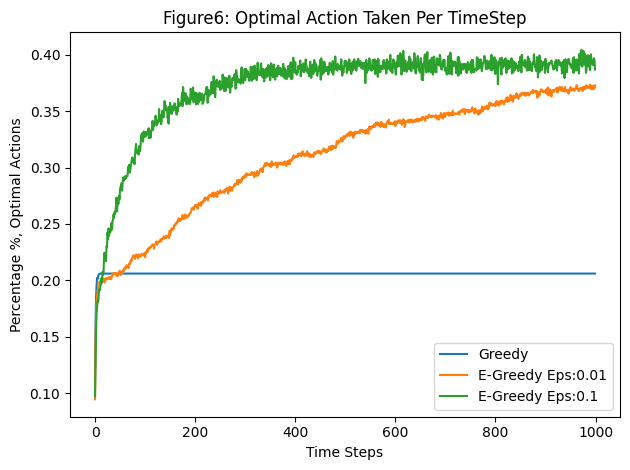

In [30]:
plt.plot(average_io, label="Greedy")
plt.plot(average_io_2, label="E-Greedy Eps:0.01")
plt.plot(average_io_3, label="E-Greedy Eps:0.1")
plt.title("Figure6: Optimal Action Taken Per TimeStep")
plt.ylabel("Percentage %, Optimal Actions")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
#Let Explore even more
#eps=0.5
#Increasing the value of eps; we will explore more
def e_greedy_policy(q_vals:list, eps=0.5):
    prob = np.random.random()
    if prob<=eps:
        action = np.random.choice(range(len(q_vals)),size=1)[0]
        return action, q_vals[action]
    else:
        return greedy_policy(q_vals=q_vals)
        

In [33]:
is_optimal_4,_, sample_rewards_3 = env.simulate(policy=e_greedy_policy)


              Initial conditions:
              Number of Trials = 2000
              Number of Steps per Trial = 1000
              NUmber of Bandit Arms = 10
              


100%|██████████| 2000/2000 [02:52<00:00, 11.61it/s]


In [34]:
avergae_sample_rewards_3 = np.mean(sample_rewards_3, axis=0)
avergae_sample_rewards_3.shape

(1000,)

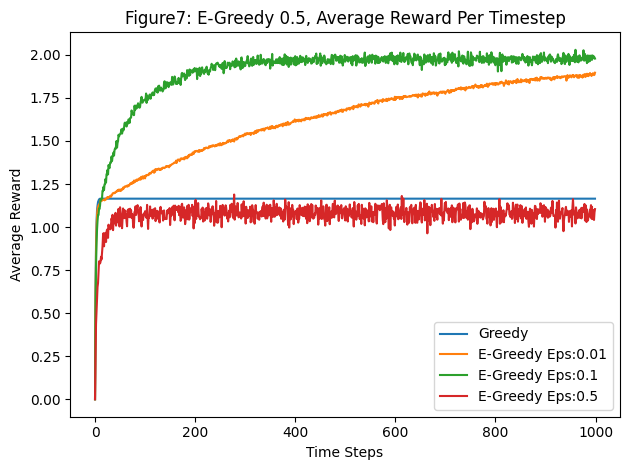

In [37]:
plt.plot(expected_reward, label="Greedy")
plt.plot(avergae_sample_rewards, label="E-Greedy Eps:0.01")
plt.plot(avergae_sample_rewards_2, label="E-Greedy Eps:0.1")
plt.plot(avergae_sample_rewards_3, label="E-Greedy Eps:0.5")
plt.ylabel("Average Reward")
plt.title("Figure7: E-Greedy 0.5, Average Reward Per Timestep")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
average_io_4 = is_optimal_4.mean(axis=0)
average_io_4.shape

(1000,)

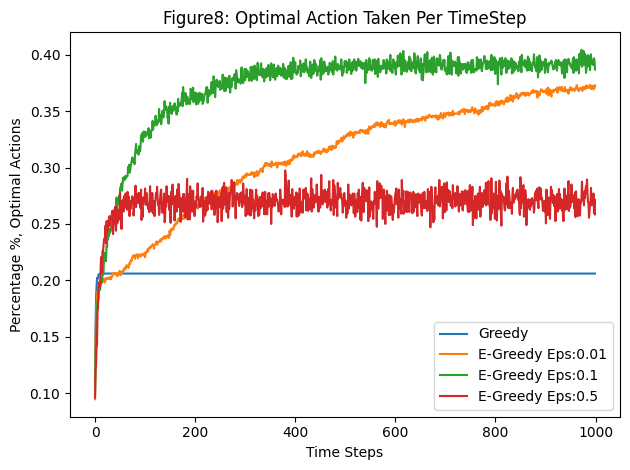

In [36]:
plt.plot(average_io, label="Greedy")
plt.plot(average_io_2, label="E-Greedy Eps:0.01")
plt.plot(average_io_3, label="E-Greedy Eps:0.1")
plt.plot(average_io_4, label="E-Greedy Eps:0.5")
plt.title("Figure8: Optimal Action Taken Per TimeStep")
plt.ylabel("Percentage %, Optimal Actions")
plt.xlabel("Time Steps")
plt.legend()
plt.tight_layout()
plt.show()